- 간단하게 파일 한 번씩 열어봤으나 크게 정리되지는 않음

In [30]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_path = "../take-home-interview/"

In [8]:
file_list = glob(data_path+"*")
file_list

['../take-home-interview/defi_credits.csv',
 '../take-home-interview/aave_loan_balance.csv',
 '../take-home-interview/installments_payments.csv',
 '../take-home-interview/defi_credits_balance.csv',
 '../take-home-interview/application_previous.csv',
 '../take-home-interview/loan_application.csv']

## loan_application

In [116]:
app = pd.read_csv(data_path + "loan_application.csv")

In [175]:
app.head()

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,3,1,8,6,5,2,0,5,0,train
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,3,1,39,2,0,0,0,train
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,3,1,8,1,11,4,3,7,2,train
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,8,6,5,4,3,7,2,train
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,3,1,3,4,37,4,3,7,2,train


In [176]:
print(f"총 데이터 수: {len(app)}")

print(f"application_id_current 중복 수: {app.application_id_current.duplicated().sum()}")

총 데이터 수: 356255
application_id_current 중복 수: 0


In [177]:
## 약 11:1로 언밸런스 함
display(app.target.value_counts())

0.0    282686
1.0     24825
Name: target, dtype: int64

In [119]:
## 결측은 test: 약 13.7%
app.target.isna().mean()

0.13682334283027606

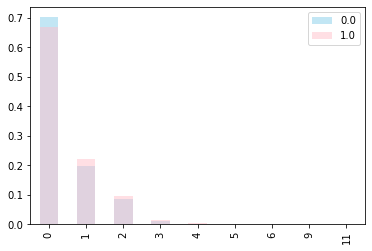

In [172]:
## col2의 분포 예시
## 차이 있음이 확인
legend = []
for target, group in app.groupby("target"):
    color = 'skyblue' if target == 0 else 'pink'
    group.col_2.value_counts(normalize=True).plot.bar(alpha=0.5, color=color)
    legend.append(target)
    
plt.legend(legend)
plt.show()

In [ ]:
feature_cols = [col for col in app.columns if col.startswith("col")]

**칼럼별 결측값**

In [217]:
missings = app.isna()
missing_df = pd.DataFrame({'missing_count':missings.sum(), 'missing_ratio':missings.mean()})

In [220]:
no_missing_column_count = (missing_df.missing_count == 0).sum()
no_missing_column_ratio = (missing_df.missing_count == 0).mean()
print(f"결측 없는 피쳐 수: {no_missing_column_count}({no_missing_column_ratio*100:.2f}%)")

결측 없는 피쳐 수: 61(49.59%)


In [219]:
missing_df[missing_df.missing_ratio>0].sort_values('missing_ratio', ascending=False)

,missing_count,missing_ratio
col_50,248360,0.697141
col_64,248360,0.697141
col_36,248360,0.697141
col_44,246861,0.692933
col_72,246861,0.692933
...,...,...
col_30,668,0.001875
col_6,278,0.000780
col_5,36,0.000101
col_19,2,0.000006


In [212]:
for col in feature_cols:
    break

In [213]:
app[col].

0        0
1        0
2        0
3        0
4        0
        ..
48739    0
48740    2
48741    1
48742    0
48743    0
Name: col_2, Length: 356255, dtype: int64

In [138]:
mean_dic = {col:{} for col in feature_cols}
median_dic = {col:{} for col in feature_cols}

In [139]:
for target, group in app.groupby('target'):
    for col in feature_cols:
        mean_dic[col][target] = group[col].mean()
        median_dic[col][target] = group[col].median()

In [143]:
mean_df = pd.DataFrame(mean_dic).T
median_df = pd.DataFrame(median_dic).T

In [150]:
mean_df.min()

0.0   -16138.176397
1.0   -14884.828077
dtype: float64

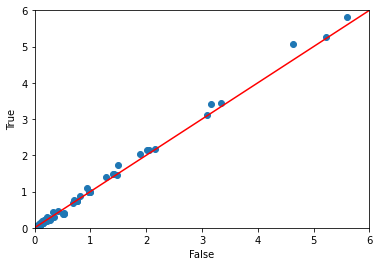

In [156]:
plt.scatter(mean_df[0.0], mean_df[1.0])
plt.plot(range(0,10), range(0,10), color='red')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.xlabel('False')
plt.ylabel("True")
plt.show()

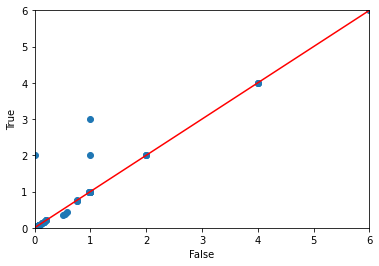

In [158]:
plt.scatter(median_df[0.0], median_df[1.0])
plt.plot(range(0,10), range(0,10), color='red')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.xlabel('False')
plt.ylabel("True")
plt.show()

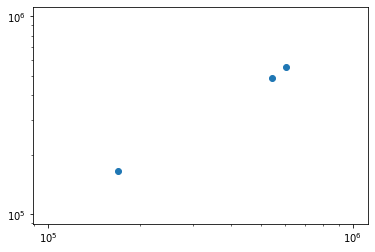

In [147]:
plt.scatter(mean_df[0.0], mean_df[1.0])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [194]:
train_app_id_set = set(app.loc[app['type'] == 'train', 'application_id_current'])
test_app_id_set = set(app.loc[app['type'] == 'test', 'application_id_current'])

In [196]:
print(f"train set의 id 수: {len(train_app_id_set):,}")
print(f"test set의 id 수: {len(test_app_id_set):,}")

train set의 id 수: 307,511
test set의 id 수: 48,744


### Bereau

## Balance

In [159]:
balance = pd.read_csv(data_path + "aave_loan_balance.csv")

In [179]:
balance.head()

,application_id_previous,application_id_current,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,...,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [181]:
balance.shape

(3840312, 23)

In [202]:
cur_app_set = set(balance.application_id_current)
prev_app_set = set(balance.application_id_previous)

In [201]:
train_inter_count = len(train_app_id_set & cur_app_set)
print(f"train과 교집합: {train_inter_count:,}({100*train_inter_count/len(train_app_id_set):.2f}%)")

test_inter_count = len(test_app_id_set & cur_app_set)
print(f"train과 교집합: {test_inter_count:,}({100*test_inter_count/len(test_app_id_set):.2f}%)")

train과 교집합: 86,905(28.26%)
train과 교집합: 16,653(34.16%)


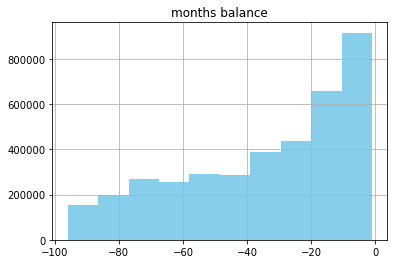

In [207]:
balance.months_balance.hist(color='skyblue')
plt.title("months balance")
plt.show()

## installments_payments

In [208]:
payments = pd.read_csv(data_path + "installments_payments.csv")

In [209]:
payments.head()

,application_id_previous,application_id_current,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [210]:
len(payments)

13605401

### Defi_credits

In [9]:
defi_credits = pd.read_csv(data_path + "defi_credits.csv")

In [10]:
defi_credits

,application_id_current,defi_id,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,-1508,NaN


### 하나 예시로 살펴보기

- 다른 Defi 서비스 사용 자적으로부터 추출된 모든 유저들의 신용 기록입니다.
- 모든 대출 건에 대해서, 대출 지원 날짜 전의 신용 기록에 대한 수만큼 행이 존재합니다.

In [61]:
defi_credits.loc[defi_credits.credit_active == "Active"].nsmallest(100, 'days_credit_enddate')

,application_id_current,defi_id,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
1064689,438173,6480224,Active,currency 1,-2578,0,-42056.0,NaN,132.795,0,427500.0,307160.865,120339.135,0.0,-13,15358.05
789514,137616,6500445,Active,currency 1,-337,0,-42042.0,NaN,0.000,0,90000.0,77269.500,12730.500,0.0,-12,NaN
535141,291169,5484492,Active,currency 1,-526,0,-41910.0,NaN,0.000,0,71252.1,0.000,0.000,0.0,-438,NaN
820648,259214,6795024,Active,currency 1,-2739,0,-41875.0,NaN,0.000,0,315000.0,307131.120,7868.880,0.0,-231,NaN
1053259,218700,6750658,Active,currency 1,-791,0,-41874.0,NaN,4883.985,0,135000.0,47760.390,87239.610,0.0,-360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218196,422660,5646982,Active,currency 1,-2922,0,-2739.0,NaN,0.000,0,21150.0,0.000,0.000,0.0,-16,NaN
1594691,256014,5595151,Active,currency 1,-2920,0,-2739.0,NaN,NaN,0,36688.5,0.000,NaN,0.0,-497,NaN
84322,221028,5728780,Active,currency 1,-2913,0,-2738.0,NaN,NaN,0,135000.0,26730.000,0.000,0.0,-2742,NaN
166738,267044,6365983,Active,currency 1,-2922,0,-2738.0,NaN,NaN,0,22792.5,0.000,0.000,0.0,-2704,NaN


In [63]:
(defi_credits.amt_credit_sum == (defi_credits.amt_credit_sum_debt + defi_credits.amt_credit_sum_limit)).mean()

0.0620527048032309

In [49]:
np.random.seed(85)

In [75]:
target_id = defi_credits.application_id_current.sample().values[0]
target_df = defi_credits[defi_credits.application_id_current == target_id]

In [76]:
target_df

,application_id_current,defi_id,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
264581,161023,5924945,Closed,currency 1,-1494,0,-1127.0,-1127.0,NaN,0,76500.0,0.0,0.0,0.0,-1127,0.0
1023084,161023,5924944,Closed,currency 1,-1285,0,-980.0,-909.0,NaN,0,34087.5,0.0,0.0,0.0,-899,0.0
1023085,161023,5924946,Active,currency 1,-655,0,77.0,NaN,NaN,0,201771.0,30640.5,0.0,0.0,-15,0.0
1023086,161023,5924947,Active,currency 1,-787,0,-353.0,NaN,NaN,0,34573.5,3091.5,NaN,0.0,-370,3136.5
1023087,161023,5924948,Closed,currency 1,-787,0,-353.0,-350.0,NaN,0,34573.5,0.0,NaN,0.0,-15,0.0
1023088,161023,5924949,Active,currency 1,-1285,0,NaN,NaN,0.0,0,0.0,0.0,0.0,0.0,-39,0.0
1023089,161023,5924950,Closed,currency 1,-1162,0,-797.0,-797.0,0.0,0,67500.0,0.0,0.0,0.0,-790,NaN


**칼럼별 결측치 파악**

In [25]:
for col in defi_credits:
    col_na = defi_credits[col].isna()
    if col_na.sum() > 0:
        print(f"{col} 결측수: {col_na.sum()}({col_na.mean()*100:.2f}%)")

days_credit_enddate 결측수: 105553(6.15%)
days_enddate_fact 결측수: 633653(36.92%)
amt_credit_max_overdue 결측수: 1124488(65.51%)
amt_credit_sum 결측수: 13(0.00%)
amt_credit_sum_debt 결측수: 257669(15.01%)
amt_credit_sum_limit 결측수: 591780(34.48%)
amt_annuity 결측수: 1226791(71.47%)


**칼럼별 기초적 통계량 확인**

In [26]:
## application_id_current: 대출 식별자
print(f"대출 건 수: {defi_credits.application_id_current.nunique():,}")

대출 건 수: 305,811


In [29]:
## prev 어쩌고가 잘못 나온 것 같은데 그냥 식별자로 이해하고 있음
print(f"defi_id 중복 수: {defi_credits.defi_id.duplicated().sum()}")

defi_id 중복 수: 0


In [13]:
## credit_active: 대출 상태
## Active: 진행 중, Closed: 상환 완료
## Sold: ??, Bad debt: ??
defi_credits.credit_active.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: credit_active, dtype: int64

In [14]:
## credit_currency: 통화 종류
defi_credits.credit_currency.value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: credit_currency, dtype: int64

days_credit 최댓값: 0


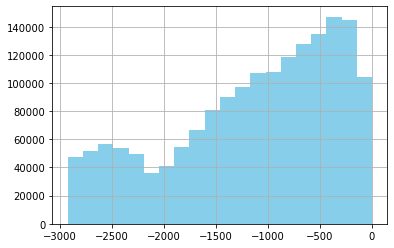

In [80]:
## days_credit: 언제 대출이 발생했었는지. 이전 대출에 관한 것이므로 항상 음수.
days_credit_max = defi_credits.days_credit.max()
print(f"days_credit 최댓값: {days_credit_max}")
assert days_credit_max <= 0

defi_credits.days_credit.hist(bins=20, color='skyblue')
plt.show()

만기 경과일 수가 0인 비율: 99.75%


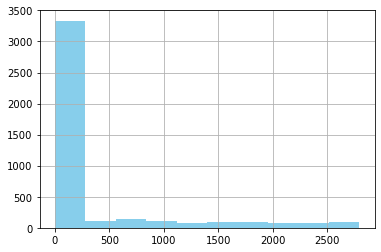

In [92]:
## credit_day_overdue: 만기경과일수
print(f"만기 경과일 수가 0인 비율: {(defi_credits.credit_day_overdue == 0).mean()*100:.2f}%")
defi_credits.loc[defi_credits.credit_day_overdue != 0, 'credit_day_overdue'].hist(color='skyblue')
plt.show()

<AxesSubplot:>

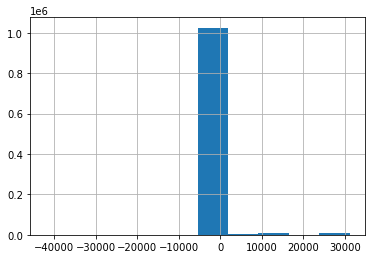

In [95]:
## days_credit_enddate: 남은 상환 기간
## closed면 다 음수여야 하는 거 아닌가?
defi_credits.loc[defi_credits.credit_active == "Closed", 'days_credit_enddate'].hist()

In [104]:
(defi_credits.loc[defi_credits.credit_active == "Closed", 'days_credit_enddate'] > 0).mean()

0.11068283928162755

<AxesSubplot:>

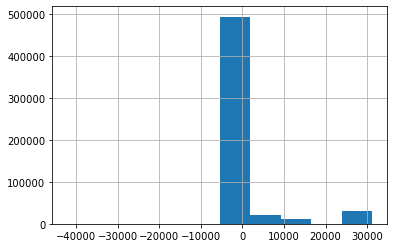

In [101]:
## days_credit_enddate: 남은 상환 기간
## active 다 양수여야 하는 거 아닌가?
defi_credits.loc[defi_credits.credit_active == "Active", 'days_credit_enddate'].hist()

In [103]:
(defi_credits.loc[defi_credits.credit_active == "Active", 'days_credit_enddate'] < 0).mean()

0.12108809448674056

<AxesSubplot:>

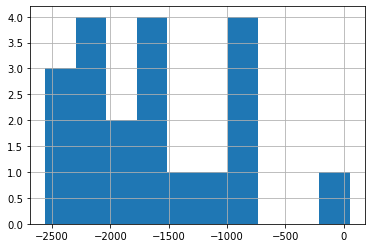

In [106]:
## days_credit_enddate: 남은 상환 기간
## Sold -> ??
defi_credits.loc[defi_credits.credit_active == "Bad debt", 'days_credit_enddate'].hist()

<AxesSubplot:>

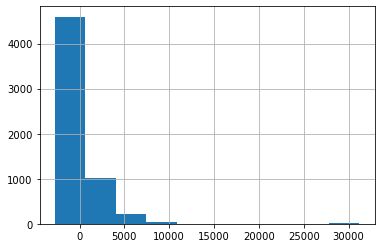

In [107]:
## days_credit_enddate: 남은 상환 기간
## Sold -> ??
defi_credits.loc[defi_credits.credit_active == "Sold", 'days_credit_enddate'].hist()

In [111]:
## days_enddate_fact
defi_credits.loc[defi_credits.days_enddate_fact.notna(), 'credit_active'].value_counts()

Closed      1079148
Active         1969
Sold           1648
Bad debt         10
Name: credit_active, dtype: int64

In [112]:
## days_enddate_fact
defi_credits.loc[defi_credits.days_enddate_fact.isna(), 'credit_active'].value_counts()

Active      628638
Sold          4879
Closed         125
Bad debt        11
Name: credit_active, dtype: int64

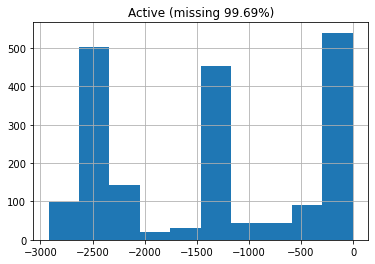

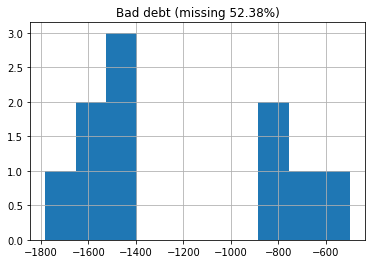

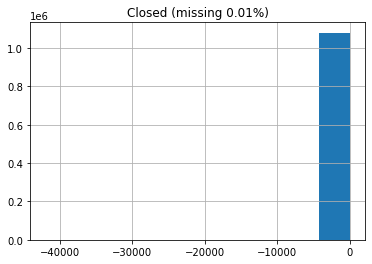

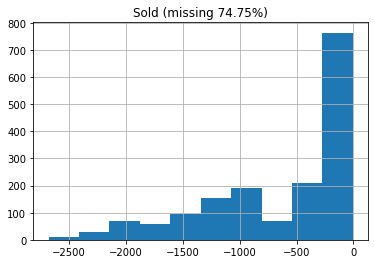

In [115]:
for active, group in defi_credits.groupby("credit_active"):
    group.days_enddate_fact.hist()
    null_ratio = group.days_enddate_fact.isna().mean()
    plt.title(f"{active} (missing {null_ratio*100:.2f}%)")
    plt.show()

In [102]:
defi_credits.loc[defi_credits.credit_active == "Active"].nsmallest(30, 'days_credit_enddate')

,application_id_current,defi_id,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity
1064689,438173,6480224,Active,currency 1,-2578,0,-42056.0,NaN,132.795,0,427500.000,307160.865,120339.135,0.0,-13,15358.05
789514,137616,6500445,Active,currency 1,-337,0,-42042.0,NaN,0.000,0,90000.000,77269.500,12730.500,0.0,-12,NaN
535141,291169,5484492,Active,currency 1,-526,0,-41910.0,NaN,0.000,0,71252.100,0.000,0.000,0.0,-438,NaN
820648,259214,6795024,Active,currency 1,-2739,0,-41875.0,NaN,0.000,0,315000.000,307131.120,7868.880,0.0,-231,NaN
1053259,218700,6750658,Active,currency 1,-791,0,-41874.0,NaN,4883.985,0,135000.000,47760.390,87239.610,0.0,-360,NaN
1329218,250999,5281303,Active,currency 1,-693,0,-41872.0,NaN,0.000,0,225000.000,224273.970,726.030,0.0,-22,NaN
1329240,271085,5281329,Active,currency 1,-2688,0,-41872.0,NaN,0.000,0,2250000.000,50190.300,2199809.700,0.0,-224,NaN
1571665,176735,5755454,Active,currency 1,-2686,0,-41869.0,NaN,0.000,0,0.000,0.000,0.000,0.0,-232,NaN
651995,406781,6784739,Active,currency 1,-420,0,-41867.0,NaN,0.000,0,225000.000,0.000,225000.000,0.0,-129,NaN
1142631,410012,6756504,Active,currency 1,-2317,0,-41866.0,NaN,0.000,0,427500.000,426620.925,879.075,0.0,-13,NaN


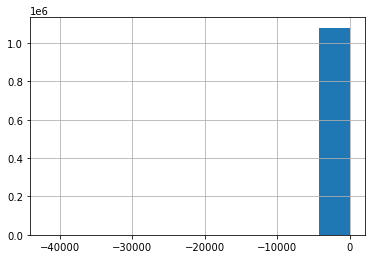

In [94]:
closed_enddate_fact = defi_credits.loc[defi_credits.credit_active == "Closed", 'days_enddate_fact']
defi_credits.loc[defi_credits.credit_active == "Closed", 'days_enddate_fact'].hist()
plt.show()

In [82]:
(defi_credits.credit_day_overdue == 0).sum()

1712211

In [21]:
(defi_credits.credit_day_overdue == 0).mean()

0.997543153572419

In [ ]:
days_credit_enddate